In [2]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [3]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_per_minute.csv', low_memory=False)

In [4]:
# Adding additional advanced metric columns

# Shooting efficiency 
df_100pos['FG3A%'] = df_100pos['FG3A'] / df_100pos['FGA']
df_100pos['PTS/FGA'] = df_100pos['PTS'] / df_100pos['FGA']
df_100pos['FG3M/FGM'] = df_100pos['FG3M'] / df_100pos['FGM']
df_100pos['FTA/FGA'] = df_100pos['FTA'] / df_100pos['FGA']

# True Shooting Percentage
df_100pos['TRU%'] = 0.5 * df_100pos['PTS'] / (df_100pos['FGA'] + 0.475 * df_100pos['FTA'])

# Assists to Turnover Ratio
df_100pos['AST_TOV'] = df_100pos['AST'] / df_100pos['TOV']

df_100pos['POSSESSION'] = df_100pos.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

df_100pos[(df_100pos['PLAYER_ID'] == 1629029)]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
17024,1629029,Luka Doncic,1610612742,DAL,20.0,72,28,44,0.389,2317.740000,0.22,0.51,0.427,0.07,0.22,0.327,0.15,0.21,0.713,0.04,0.21,0.24,0.19,0.11,0.03,0.01,0.02,0.06,0.17,0.66,2018-19,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.431373,1.294118,0.318182,0.411765,0.541205,1.727273,0.6724
17025,1629029,Luka Doncic,1610612742,DAL,21.0,61,36,25,0.590,2047.245000,0.28,0.61,0.463,0.08,0.26,0.316,0.21,0.27,0.758,0.04,0.24,0.28,0.26,0.13,0.03,0.01,0.03,0.07,0.22,0.86,2019-20,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.426230,1.409836,0.285714,0.442623,0.582459,2.000000,0.8188
17026,1629029,Luka Doncic,1610612742,DAL,21.0,6,2,4,0.333,214.566667,0.30,0.60,0.500,0.07,0.21,0.364,0.20,0.30,0.656,0.02,0.26,0.27,0.24,0.14,0.03,0.01,0.02,0.08,0.26,0.87,2019-20,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.350000,1.450000,0.233333,0.500000,0.585859,1.714286,0.8520
17027,1629029,Luka Doncic,1610612742,DAL,22.0,66,40,26,0.606,2262.396667,0.29,0.60,0.479,0.08,0.24,0.350,0.15,0.21,0.730,0.02,0.21,0.23,0.25,0.12,0.03,0.02,0.02,0.07,0.16,0.81,2020-21,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.400000,1.350000,0.275862,0.350000,0.578778,2.083333,0.7924
17028,1629029,Luka Doncic,1610612742,DAL,22.0,7,3,4,0.429,281.021667,0.34,0.70,0.490,0.11,0.27,0.408,0.10,0.18,0.529,0.01,0.18,0.20,0.26,0.11,0.03,0.01,0.02,0.06,0.16,0.89,2020-21,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.385714,1.271429,0.323529,0.257143,0.566518,2.363636,0.8792
17029,1629029,Luka Doncic,1610612742,DAL,23.0,65,44,21,0.677,2300.718333,0.28,0.61,0.457,0.09,0.25,0.353,0.16,0.21,0.744,0.02,0.23,0.26,0.25,0.13,0.03,0.02,0.02,0.06,0.17,0.80,2021-22,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.409836,1.311475,0.321429,0.344262,0.563579,1.923077,0.8124
17030,1629029,Luka Doncic,1610612742,DAL,23.0,15,7,8,0.467,551.956667,0.29,0.64,0.455,0.09,0.27,0.345,0.19,0.24,0.770,0.02,0.25,0.27,0.17,0.11,0.05,0.02,0.03,0.08,0.21,0.86,2021-22,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.421875,1.343750,0.310345,0.375000,0.570292,1.545455,0.8356
17031,1629029,Luka Doncic,1610612742,DAL,24.0,66,33,33,0.500,2390.471667,0.30,0.61,0.496,0.08,0.23,0.342,0.22,0.29,0.742,0.02,0.22,0.24,0.22,0.10,0.04,0.01,0.02,0.07,0.20,0.89,2022-23,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,0.377049,1.459016,0.266667,0.475410,0.595119,2.200000,0.8176


In [5]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
df_100pos['POSITION'] = df_100pos['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [6]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [7]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [8]:
# New object for European players playing at F in regular season games:
europe_C_regular = filter_europe(df_100pos, 'COUNTRY', europe)
europe_C_regular = europe_C_regular.loc[europe_C_regular['POSITION'].isin(['C']) & europe_C_regular['Season'].isin(['Regular Season'])]

In [2]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

NameError: name 'europe' is not defined

In [1]:
# New object for Non-europe players playing at F in regular season games:
non_europe_C_regular = filter_non_europe(df_100pos)
non_europe_C_regular = non_europe_C_regular.loc[non_europe_C_regular['POSITION'].isin(['C']) & non_europe_C_regular['Season'].isin(['Regular Season'])]

NameError: name 'filter_non_europe' is not defined

In [11]:
# Number of positions per unique European player:
europe_C_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    82
Name: PLAYER_ID, dtype: int64

In [12]:
europe_C_regular[europe_C_regular['PLAYER_NAME'] == 'Nikola Jokic']

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
15457,203999,Nikola Jokic,1610612743,DEN,21.0,80,31,49,0.388,1732.551667,0.18,0.35,0.512,0.02,0.05,0.333,0.09,0.11,0.811,0.10,0.22,0.32,0.11,0.06,0.05,0.03,0.03,0.12,0.11,0.46,2015-16,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.142857,1.314286,0.111111,0.314286,0.571784,1.833333,0.3584
15458,203999,Nikola Jokic,1610612743,DEN,22.0,73,37,36,0.507,2037.728333,0.24,0.42,0.578,0.02,0.07,0.324,0.09,0.11,0.825,0.10,0.25,0.35,0.18,0.08,0.03,0.03,0.02,0.11,0.11,0.60,2016-17,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.166667,1.428571,0.083333,0.261905,0.635257,2.250000,0.4484
15459,203999,Nikola Jokic,1610612743,DEN,23.0,75,43,32,0.573,2442.505000,0.21,0.41,0.499,0.05,0.11,0.396,0.11,0.13,0.850,0.08,0.25,0.33,0.19,0.09,0.04,0.02,0.02,0.09,0.16,0.57,2017-18,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.268293,1.390244,0.238095,0.317073,0.604134,2.111111,0.4772
15460,203999,Nikola Jokic,1610612743,DEN,24.0,80,53,27,0.663,2503.586667,0.25,0.48,0.511,0.03,0.11,0.307,0.12,0.14,0.821,0.09,0.25,0.35,0.23,0.10,0.04,0.02,0.03,0.09,0.17,0.64,2018-19,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.229167,1.333333,0.120000,0.291667,0.585544,2.300000,0.5516
15462,203999,Nikola Jokic,1610612743,DEN,25.0,73,46,27,0.630,2335.405000,0.24,0.46,0.528,0.03,0.11,0.314,0.11,0.13,0.817,0.07,0.23,0.30,0.22,0.10,0.04,0.02,0.01,0.10,0.16,0.62,2019-20,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.239130,1.347826,0.125000,0.282609,0.594154,2.200000,0.5472
15464,203999,Nikola Jokic,1610612743,DEN,26.0,72,47,25,0.653,2487.781667,0.29,0.52,0.566,0.04,0.10,0.388,0.14,0.16,0.868,0.08,0.23,0.31,0.24,0.09,0.04,0.02,0.02,0.08,0.17,0.76,2020-21,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.192308,1.461538,0.137931,0.307692,0.637584,2.666667,0.6004
15466,203999,Nikola Jokic,1610612743,DEN,27.0,74,46,28,0.622,2475.591667,0.31,0.53,0.583,0.04,0.12,0.337,0.15,0.19,0.810,0.08,0.33,0.41,0.24,0.11,0.04,0.03,0.03,0.08,0.20,0.81,2021-22,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.226415,1.528302,0.129032,0.358491,0.652963,2.181818,0.6436
15468,203999,Nikola Jokic,1610612743,DEN,28.0,69,48,21,0.696,2323.006667,0.28,0.44,0.632,0.02,0.06,0.383,0.15,0.18,0.822,0.07,0.28,0.35,0.29,0.11,0.04,0.02,0.02,0.07,0.17,0.73,2022-23,Regular Season,NaN,Serbia,2014,2,41,15,C,6-11,284.0,2015,2023,0.136364,1.659091,0.071429,0.409091,0.694577,2.636364,0.5592


In [13]:
# Number of positions per unique US player:
non_europe_C_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
C    346
Name: PLAYER_ID, dtype: int64

In [14]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_C_regular['Europe'] = 'European'
non_europe_C_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_C_regular, non_europe_C_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'POSSESSION']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


alt.VConcatChart(...)

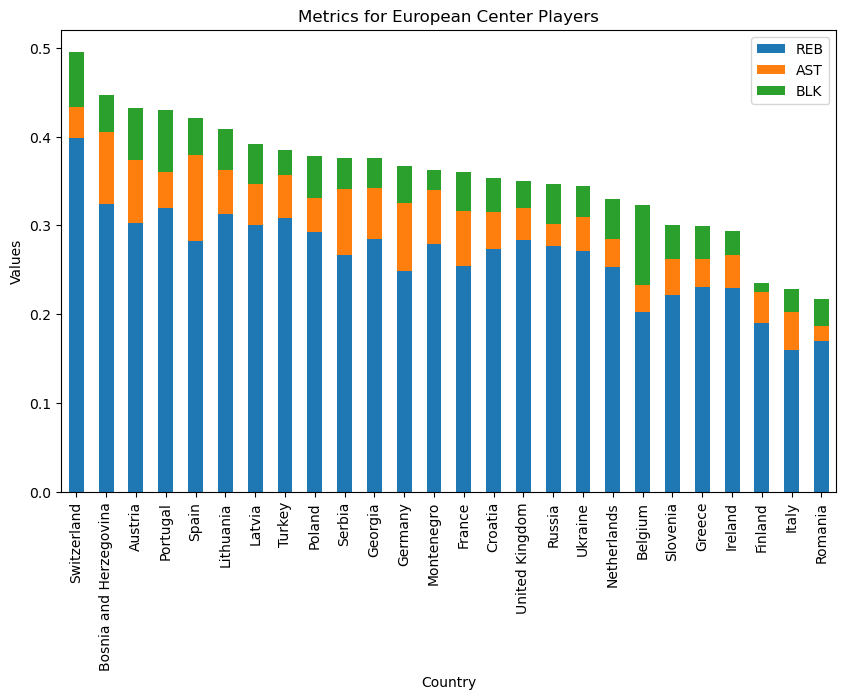

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean values for rebounds, assists, and blocks for European center players:
avg_REB_europe = europe_C_regular.groupby('COUNTRY')['REB'].mean().reset_index()
avg_AST_europe = europe_C_regular.groupby('COUNTRY')['AST'].mean().reset_index()
avg_BLK_europe = europe_C_regular.groupby('COUNTRY')['BLK'].mean().reset_index()

# Merge the three DataFrames
merged_df = pd.merge(avg_REB_europe, avg_AST_europe, on='COUNTRY')
merged_df = pd.merge(merged_df, avg_BLK_europe, on='COUNTRY')

# Set 'COUNTRY' as index
merged_df.set_index('COUNTRY', inplace=True)

# Calculate overall stats (sum of mean values of all metrics)
merged_df['TOTAL'] = merged_df.sum(axis=1)

# Sort the DataFrame by overall stats (descending order)
sorted_df = merged_df.sort_values(by='TOTAL', ascending=False)

# Plot
sorted_df.drop('TOTAL', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Metrics for European Center Players')

# Show plot
plt.show()


In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [18]:
df_anthro_players = pd.read_csv('DataFiles/player_anthro.csv')


In [19]:
df_anthro_players.tail()

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED
1547,1630652.0,1630652,Trevion,Williams,Trevion Williams,C,79.25,6' 7.25'',80.75,6' 8.75'',264.6,86.75,7' 2.75'',108.5,9' 0.50'',10.8,9.0,10.25,2022-23,10.250000,9.000000
1548,1631258.0,1631258,Bryson,Williams,Bryson Williams,PF-C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769
1549,1631109.0,1631109,Mark,Williams,Mark Williams,C,84.00,7' 0.00'',86.00,7' 2.00'',242.4,90.50,7' 6.50'',117.0,9' 9.00'',5.4,9.0,9.75,2022-23,9.750000,9.000000
1550,1630592.0,1630592,Jalen,Wilson,Jalen Wilson,SF-PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769
1551,1630855.0,1630855,Fanbo,Zeng,Fanbo Zeng,SF-PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769
